# MNIST - Classification

<h1 align="center">- $\infty$ -</h1> 

## Getting the data

In [15]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [16]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [17]:
y.shape

(70000,)

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis("off")
plt.show()

<Figure size 640x480 with 1 Axes>

In [19]:
y[12]

'3'

In [20]:
import numpy as np
y = y.astype(np.uint8)

**Split data into train and test set before starting the project!**

In [21]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## SGD-Classifier -  **Starting by simply classifying 5's.**

In [29]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [30]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

sgd_clf.predict([X_train[12]])

**Validating the model performance**

In [33]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, 
                cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

**Not a indicator of good score through this method, since only 10% of the dataset is 5's; i.e. skewed dataset.**
**Insted, we use confusion matrix**

In [36]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [38]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

**Image of confusion matrix:**

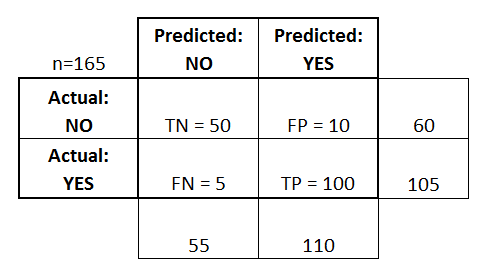

In [43]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [40]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [44]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7325171197343846

**Depending on the purpose of the project, you decide the level of precision and recall you need. There is a trade-off. Below, we select the threshold value for a 90% precision:**

In [46]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                            method="decision_function")

In [47]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores) 

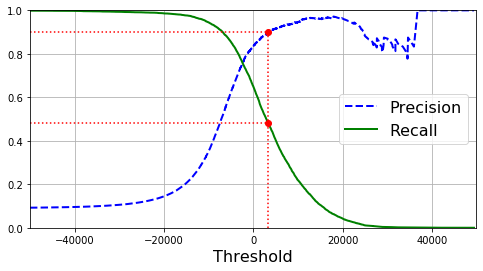

In [68]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])
    

plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
plt.show()

In [54]:
precisions[:-1]

array([0.09040123, 0.09038606, 0.09038757, ..., 1.        , 1.        ,
       1.        ])

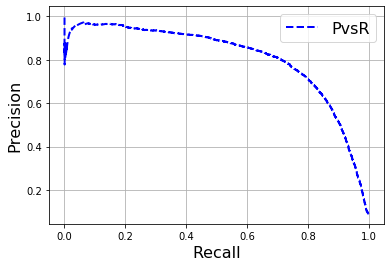

In [75]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls[:-1], precisions[:-1], "b--", label="PvsR", linewidth=2)
    plt.legend(loc="upper right", fontsize=16)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.grid(True)
    #plt.axis([0, 1, 0, 1])
    
plot_precision_vs_recall(precisions, recalls)

In [76]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

3370.0194991439557

In [77]:
# Predicting values based on the 90% threshold
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [78]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [79]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

### ROC Curve - receiver operating characteristic

In [84]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

No handles with labels found to put in legend.


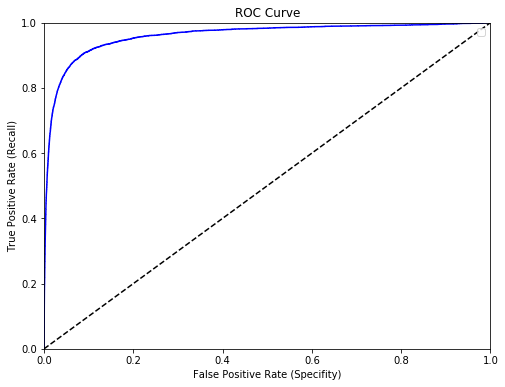

In [98]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, "b-", label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.ylabel("True Positive Rate (Recall)")
    plt.xlabel("False Positive Rate (Specifity)")
    plt.legend(loc="upper right")

    
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.title("ROC Curve")
plt.show()

In [99]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)


0.9604938554008616

The closer the ROC AUC score is to 1, the better the classifier is with a low False Positive Rate and a high True Positve Rate. The closer to an AUC score of 0.5, the more random the classifier is. 

**RULE OF THUMB**
- If the ratio of positives within the dataset is RARE, use Precision vs Recall Curve. 
- Otherwise, use the ROC Curve.

## Random Forest Classifier

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5,
                                    cv=3, method="predict_proba")

/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [108]:
y_scores_forest = y_probas_forest[:,1]

In [109]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

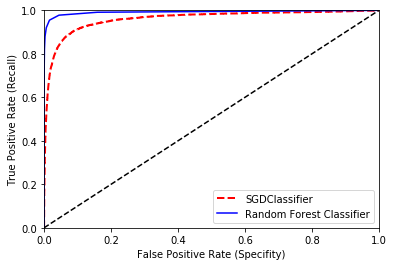

In [115]:
plt.plot(fpr, tpr, "r--", linewidth=2, label="SGDClassifier")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest Classifier")
plt.legend(loc="lower right")
plt.show()

In [116]:
print("Random Forest ROC AUC: ", roc_auc_score(y_train_5, y_scores_forest))
print("SGD Classifier ROC AUC: ", roc_auc_score(y_train_5, y_scores))

Random Forest ROC AUC:  0.9920527492698306
SGD Classifier ROC AUC:  0.9604938554008616


**Random forest is the better classifier**

### RandomForestClassifier - Multiclass Classification

In [117]:
rf_clf = RandomForestClassifier(random_state=42)

In [118]:
rf_clf.fit(X_train, y_train)

/Users/kaya/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [127]:
rf_clf.predict([X_train[110]])

array([9], dtype=uint8)

In [139]:
rf_clf.feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.76381139e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.96406690e-06, 0.00000000e+00,
       3.36846120e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [132]:
## Cross validation test score
cross_val_score(rf_clf, X_train, y_train, cv=3,
               scoring="accuracy")

array([0.94116177, 0.93949697, 0.94374156])

In [136]:
## Quickly standardizing the data to see if it increases the scores.
from sklearn.preprocessing import MinMaxScaler

std = MinMaxScaler()
X_train_std = std.fit_transform(X_train.astype(np.float64))

In [137]:
cross_val_score(rf_clf, X_train_std, y_train, cv=3,
               scoring="accuracy")

array([0.94121176, 0.93929696, 0.94379157])

**Scaling does not improve scores with the RandomForestClassifier.**

In [140]:
y_train_pred = cross_val_predict(rf_clf, X_train, y_train, cv=3)

In [141]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5801,    3,   18,    5,    8,   17,   33,    3,   32,    3],
       [   1, 6622,   32,   16,   11,    9,   10,   13,   17,   11],
       [  54,   22, 5642,   38,   41,   11,   31,   55,   51,   13],
       [  32,   20,  128, 5648,   11,  103,   11,   50,   95,   33],
       [  19,   19,   25,   10, 5531,   12,   39,   18,   29,  140],
       [  44,   24,   28,  175,   29, 4970,   56,   13,   50,   32],
       [  61,   17,   32,    5,   31,   56, 5689,    0,   24,    3],
       [   9,   32,   98,   32,   60,    6,    3, 5920,   16,   89],
       [  32,   62,   92,  130,   48,   99,   32,   19, 5267,   70],
       [  40,   18,   36,   84,  170,   40,    7,  100,   56, 5398]])

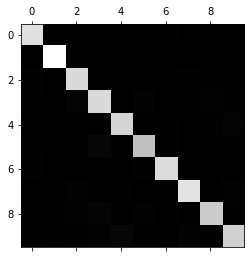

In [150]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
#plt.figure(figsize=(20, 20)) 
plt.show()

In [157]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

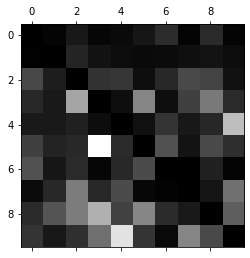

In [159]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [161]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

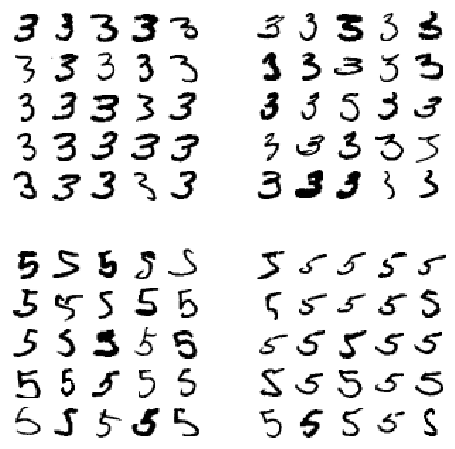

In [162]:
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

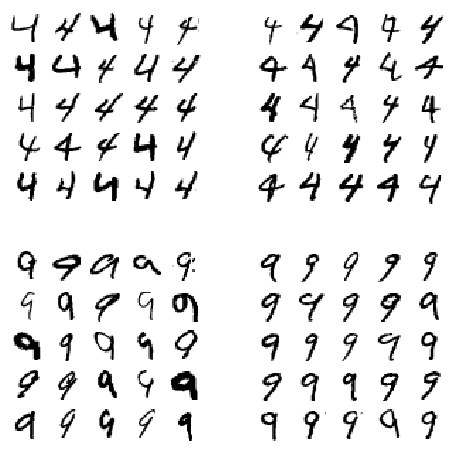

In [166]:
cl_a, cl_b = 4, 9
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()

## K-Neighbours Classifier

In [9]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier()

In [ ]:
#y_train_pred_kn = cross_val_predict(kn_clf, X_train, y_train, cv=3)

In [11]:
from sklearn.model_selection import cross_val_score

cross_val_score(kn_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.96760648, 0.96704835, 0.96754513])

In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'weights':('uniform', 'distance'),
    'n_neighbors':[1, 3, 8, 10]
}]

grid_search = GridSearchCV(kn_clf, param_grid, cv=3, verbose=3)

In [ ]:
grid_search.fit(X_train, y_train)

## Data Augumentation --> adding shifted pictures

In [25]:
from scipy.ndimage.interpolation import shift, rotate
import numpy as np

In [12]:
def shift_image(image, dx, dy):
    image = image.reshape((28,28))
    shifted_image = shift(image, [dx, dy], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [33]:
def rotate_image(image, deg):
    image = image.reshape((28,28))
    rotated_image = rotate(image, deg, reshape=False)
    return rotated_image.reshape([-1])

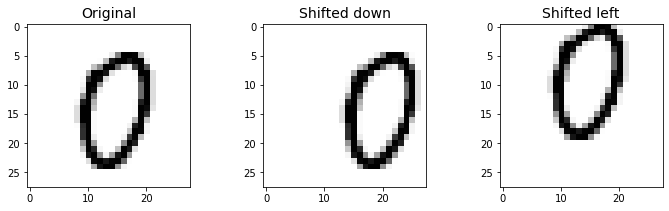

In [22]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

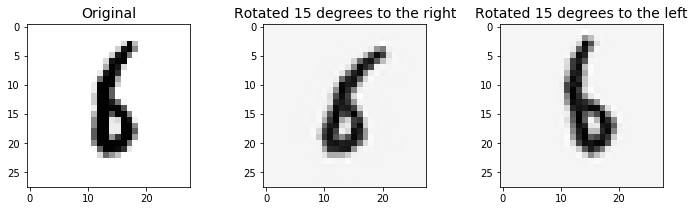

In [37]:
image = X_train[1100]
rotated_image_right = rotate_image(image, -15)
rotated_image_left = rotate_image(image, 15)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Rotated 15 degrees to the right", fontsize=14)
plt.imshow(rotated_image_right.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Rotated 15 degrees to the left", fontsize=14)
plt.imshow(rotated_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [51]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

# Adding shifted images to the dataset
for dx, dy in ((1, 0), (0, 1), (-1, 0), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

# Adding rotated images to the dataset
for deg in [15, -15]:
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(rotate_image(image, deg))
        y_train_augmented.append(label)

In [52]:
type(X_train_augmented)

list

In [53]:
X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [54]:
# Shuffle the augmented dataset
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [57]:
from sklearn.neighbors import KNeighborsClassifier
optimal_params = {'n_neighbors': 4, 'weights': 'distance'}
knn_clf = KNeighborsClassifier(**optimal_params)

In [58]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [61]:
# Predict with the TEST SET for final prediction
from sklearn.metrics import accuracy_score
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.979

In [63]:
# Save final model
import joblib

joblib.dump(knn_clf, "knn_clf_979.pkl")

['knn_clf_979.pkl']

**Project completed with a 97,9% accuracy!**